# Frequently Used Data

## data format

In [1]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import requests
from matplotlib.font_manager import fontManager
from collections import Counter

path = "../datasets.jsonl"
font_path = "../TaipeiSansTCBeta-Regular.ttf"

fontManager.addfont(font_path)
mpl.rc('font', family='Taipei Sans TC Beta')

o_dataset = []
with open(path, "r") as f: 
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) 
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_dataset.append(data)
print(o_dataset[:2])

o_topic = []
path = "../topics.jsonl"

with open(path, "r") as f: 
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) 
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_topic.append(data)
print(o_topic[0])

o_project = []
path = "../projects.jsonl"

with open(path, "r") as f: 
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0)
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_project.append(data)
print(o_project[0])

[{'author': '國立臺南大學流域生態環境保育研究中心', 'author_email': None, 'contact_email': '', 'contact_person': '', 'creator_user_id': 'b921b80f-2fef-4551-a2b3-5b252a84ec1d', 'data_type': ['doc', 'network'], 'end_time': '2023-09', 'groups': [], 'id': 'f4159f57-d620-4356-982a-5fa6d3501d9d', 'isopen': True, 'keywords': [], 'language': [], 'license_id': 'pd', 'license_title': 'Public Domain', 'license_url': 'https://creativecommons.org/publicdomain/mark/1.0/', 'maintainer': None, 'maintainer_email': None, 'metadata_created': '2022-12-31T01:52:30.320236', 'metadata_modified': '2023-08-25T03:34:40.265114', 'name': 'l15-l18', 'notes': '本工程施工期程為111/8/20～112/8/19(預計)，由金主營造工程股份有限公司委託本中心生態背景人員進行①檢閱施工廠商填查「生態保育措施自主檢查表*」內容並協助上傳至本資料集，以落實資訊公開之即時性；②第一級品管外部稽核三次(預計112年2-4月實施)，檢查生態保育措施執行情形。', 'num_resources': 19, 'num_tags': 2, 'organization': None, 'private': False, 'process_step': '', 'relationships_as_object': [], 'relationships_as_subject': [], 'remarks': '', 'resources': [{'cache_last_updated': None, 'cache_url': No

## Largest author


[('高雄市政府水利局、科進栢誠工程顧問股份有限公司', 117), ('中央研究院人社中心GIS專題中心：台灣歷史文化地圖', 116), ('嘉義縣政府', 99), ('6456', 97), ('逢甲大學水利發展中心', 77), ('6458', 63), ('逢甲大學', 44), ('磐誠工程顧問股份有限公司', 44), ('samson', 37), ('Linda Chang', 37)]


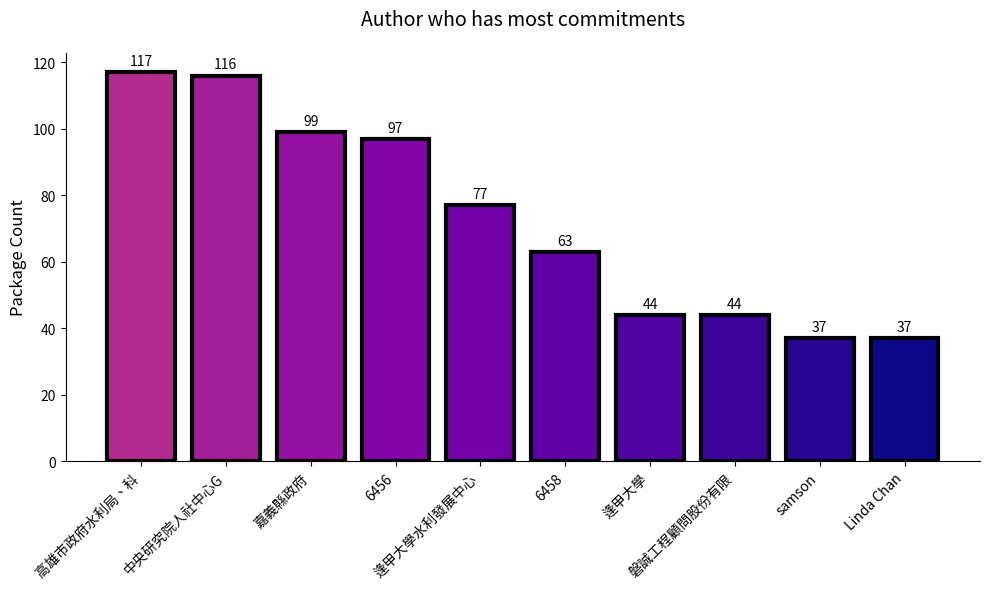

In [2]:
author = []
for i in o_dataset[:-1]: # last row doesn't have author
  author.append(i['author'])
  
author_counts = Counter(author) 
top_authors = author_counts.most_common(10)
print(top_authors)

top_authors_names = [i[0][:10] for i in top_authors]   # limit the length of authors' names
top_authors_mentions = [i[1] for i in top_authors]

#for the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size
ax = plt.gca()
colors = plt.cm.plasma(np.linspace(0.4, 0, len(top_authors_names)))
bars = plt.bar(top_authors_names, top_authors_mentions, color=colors, edgecolor='black', linewidth=3)


# Add data labels on the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)  # Adjust label position and fontsize

plt.ylabel('Package Count', fontsize=12)
plt.title('Author who has most commitments', fontsize=14, pad=20)

plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and adjust fontsize of x tick labels
plt.yticks(fontsize=10)  # Adjust fontsize of y tick labels

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## Largest User 
```{warning}
   may need permission to fetch api
```
* package information  only has uers_id, need another source to find user_name
* change the package_list with the api

Temporary way of fetching user information.

In [3]:
# url = "https://data.depositar.io/api/3/action/user_list"
# headers = {
#     "Authorization": APIKEY
# }
# package_list = requests.get(url,headers=headers).json() # get the relation betwenn id and name
package_list={"help": "https://data.depositar.io/api/3/action/help_show?name=user_list", "success": True, "result": [{"id": "4b57a7ac-902d-4cba-83d4-8e07235ebe6e", "name": "u10313335", "fullname": None, "created": "2018-08-28T13:48:11.265180", "about": None, "activity_streams_email_notifications": False, "sysadmin": False, "state": "pending", "image_url": None, "display_name": "40423229l-1896", "email_hash": "6ed6fde6c8c5f635e056d321b197cad1", "number_created_packages": 0, "image_display_url": None}, {"id": "dbf82753-0564-4ca2-a855-fa81cb5615d1", "name": "lovewra100", "fullname": "5 Jenis Obat Bius Sudah Terbukti Sangat Ampuh", "created": "2022-10-17T15:13:31.090626", "about": None, "activity_streams_email_notifications": False, "sysadmin": False, "state": "active", "image_url": "obat-bius.html", "display_name": "5 Jenis Obat Bius Sudah Terbukti Sangat Ampuh", "email_hash": "a53a96fba22978eecec0e33f7349f8ca", "number_created_packages": 0, "image_display_url": "https://data.depositar.io/uploads/user/obat-bius.html"}, {"id": "a1ab3e32-041b-4688-884d-30d72f42f29d", "name": "pcecc", "fullname": None, "created": "2018-05-14T13:14:54.707423", "about": None, "activity_streams_email_notifications": False, "sysadmin": False, "state": "pending", "image_url": None, "display_name": "a329443-8969", "email_hash": "6b7e55824506f1191efe213fbe914e1e", "number_created_packages": 0, "image_display_url": None}]}

[(349, 'lovewra100'), (193, 'u10313335'), (166, 'pcecc')]


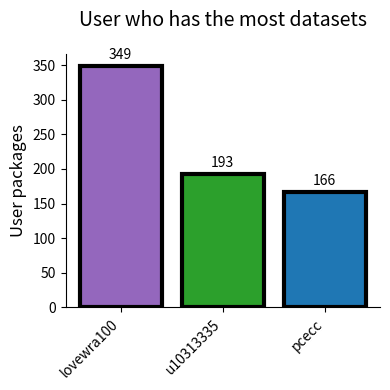

In [4]:
id_name = []
_id = []

for i in o_dataset:    # dataset only has id
    _id.append(i['creator_user_id'])

user_counts = Counter(_id)
top_user = user_counts.most_common(10) # number for top users

for i in package_list['result']:    #package has name and id
    id_name.append((i['id'],i['name']))


id_name_dic = dict(id_name)
largest_user = []
# Iterate through the name_list and match names with their corresponding IDs
for name, name_value in top_user:
    if name in id_name_dic:
        id_value = id_name_dic[name]
        largest_user.append((name_value, id_value))
print(largest_user)
largest_user_name = [i[1] for i in largest_user]
largest_user_value = [i[0] for i in largest_user]

plt.figure(figsize=(4, 4))  # Adjust the figure size
ax = plt.gca()
colors = plt.cm.tab20(np.linspace(0.4, 0, len(largest_user_name)))
bars = plt.bar(largest_user_name, largest_user_value, color=colors, edgecolor='black', linewidth=3)


# Add data labels on the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)  # Adjust label position and fontsize

plt.ylabel('User packages', fontsize=12)
plt.title('User who has the most datasets', fontsize=14, pad=20)

plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and adjust fontsize of x tick labels
plt.yticks(fontsize=10)  # Adjust fontsize of y tick labels

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## Largest project
<p></p>


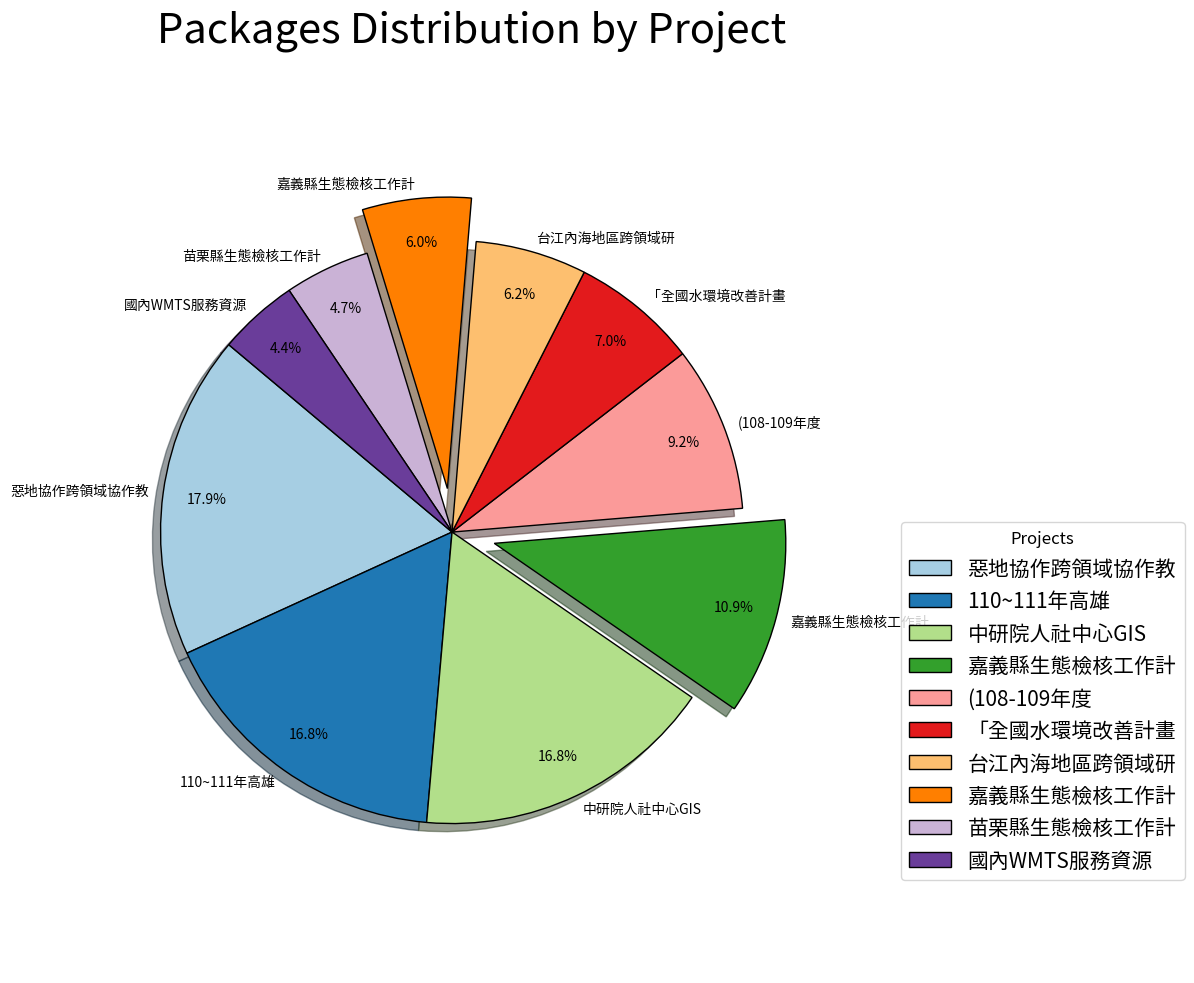

In [5]:
largest_project = []

for i in o_project:
  largest_project.append({'display_name':i['display_name'],'packages':i['package_count']})

sort_project = sorted(largest_project,key=lambda x:x['packages'],reverse=True)
pro_values = [i['packages']for i in sort_project[:10]]             # top 10 project, could alter to what you want
pro_labels = [i['display_name'][:10] for i in sort_project[:10]]


colors = plt.cm.Paired(range(len(data)))
# Explode a specific slice
explode = [0.15 if name.startswith('嘉義縣') else 0 for name in pro_labels]

plt.figure(figsize=(12, 10))
plt.pie(
    pro_values,
    labels=pro_labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,  # Explode a slice for emphasis
    shadow=True,      # Add shadow to the chart
    wedgeprops={'edgecolor': 'black'},  # Add black edge to each slice
    pctdistance=0.85,  # Distance of the percentage labels from the center
    labeldistance=1.05,  # Distance of the slice labels from the center
)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Packages Distribution by Project', fontsize=30)
plt.rcParams['font.size'] = 12
# Adding a legend with custom colors and display names
plt.legend(
    loc='upper left',
    labels=pro_labels,
    bbox_to_anchor=(1, 0.5),
    prop={'size': 15},
    title="Projects"
)

plt.tight_layout()
plt.show()

## Largest tags

<p>秀出被使用最多次的tag還有使用次數</p>

[('生態檢核', 208), ('高雄市', 142), ('playaround workshop', 38), ('UAV', 36), ('台江國家公園', 35), ('UAS', 33), ('前瞻水環境建設', 29), ('論文', 25), ('水與安全計畫', 24), ('LTSER', 21)]


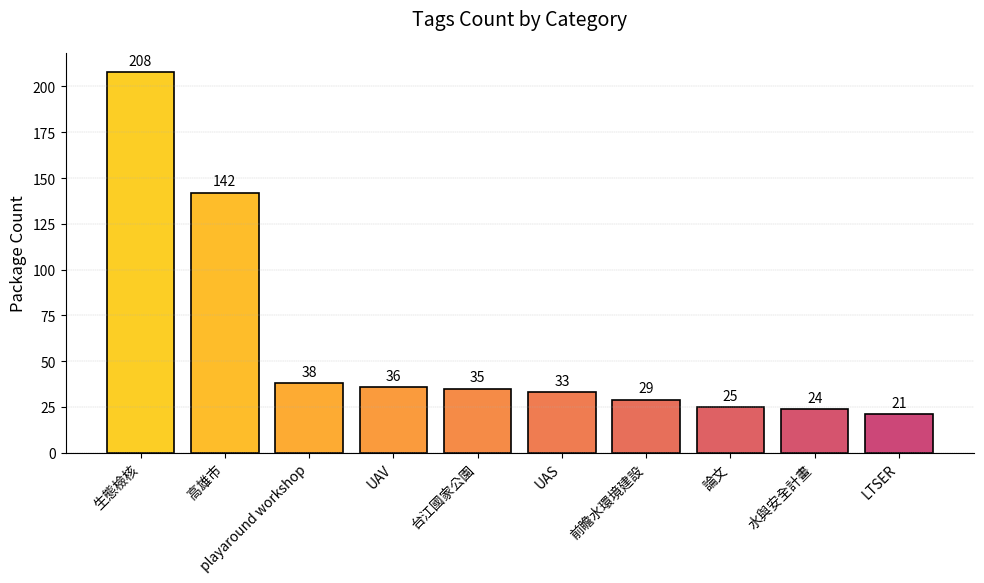

In [6]:
url = "http://data.depositar.io/api/3/action/package_search?facet.field=[%22tags%22]&facet.limit=10" 
package_list = requests.get(url).json() # fastest way to get the most used tags

tag_number =  package_list['result']['facets']['tags']
tag_list = [(key,value) for key, value in tag_number.items()]
tag_values = tag_number.values()
tag_labels = tag_number.keys()
print(tag_list)


plt.figure(figsize=(10, 6))  # Adjust the figure size
ax = plt.gca()
colors = plt.cm.plasma(np.linspace(0.9, 0.5, len(tag_labels)))
# Create the bar plot
bars = plt.bar(tag_labels, tag_values, color=colors, edgecolor='black', linewidth=1.2)


# Add data labels on the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)  # Adjust label position and fontsize
plt.ylabel('Package Count', fontsize=12)
plt.title('Tags Count by Category', fontsize=14, pad=20)

plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and adjust fontsize of x tick labels
plt.yticks(fontsize=10)  # Adjust fontsize of y tick labels

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a grid for better readability
ax.yaxis.grid(True, linestyle='--', linewidth=0.3, alpha=0.7)

plt.tight_layout()
plt.show()

## Largest topic

[{'name': 'thcts', 'package_count': 115}, {'name': 'geography-and-places', 'package_count': 64}, {'name': 'natural-and-physical-sciences', 'package_count': 57}, {'name': 'society-and-social-sciences', 'package_count': 54}, {'name': 'eco-check', 'package_count': 51}, {'name': 'society', 'package_count': 45}, {'name': 'uas-observation', 'package_count': 40}, {'name': 'biota', 'package_count': 32}, {'name': 'oceans', 'package_count': 24}, {'name': 'farming', 'package_count': 18}, {'name': 'general-reference', 'package_count': 15}, {'name': 'culture-and-the-arts', 'package_count': 12}, {'name': 'economy', 'package_count': 12}, {'name': 'climatology-meteorology-atmosphere', 'package_count': 11}, {'name': 'human-activities', 'package_count': 10}, {'name': 'geoscientific-information', 'package_count': 10}, {'name': 'environment', 'package_count': 10}, {'name': 'religion-and-belief-systems', 'package_count': 9}, {'name': '14-climate-change', 'package_count': 9}, {'name': 'asian-soundscape-moni

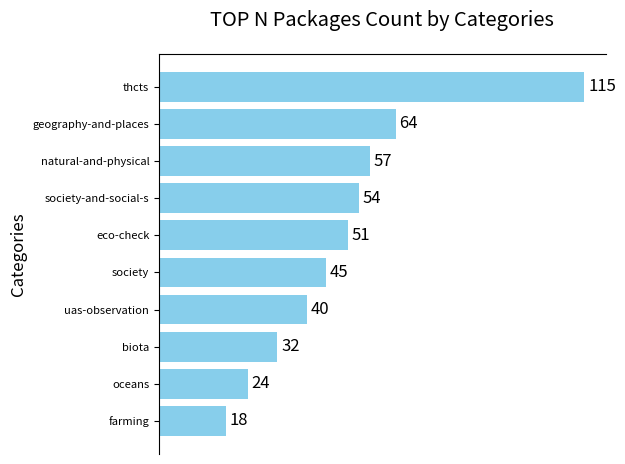

In [7]:

unsort_topic = []
for i in o_topic:
  unsort_topic.append({'name': i['name'], 'package_count': i['package_count']})

topic = sorted(unsort_topic, key=lambda x: x['package_count'],reverse=True)
values = [item['package_count'] for item in topic[:10]] # top 10 topics
labels = [item['name'][:20] for item in topic[:10]]
print(topic)


plt.barh(labels, values, color='skyblue')  # Use barh for horizontal bars
plt.ylabel('Categories')
plt.title('TOP N Packages Count by Categories',pad=20)

# Reverse the y-axis for better presentation (optional)
plt.gca().invert_yaxis()

# Add data labels on the bars
for index, value in enumerate(values):
    plt.text(value + 1, index, str(value), va='center')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.yticks(fontsize=8)
# Remove ticks
plt.tick_params( bottom=False, labelbottom=False)
plt.tight_layout()
plt.show()



## Largest type

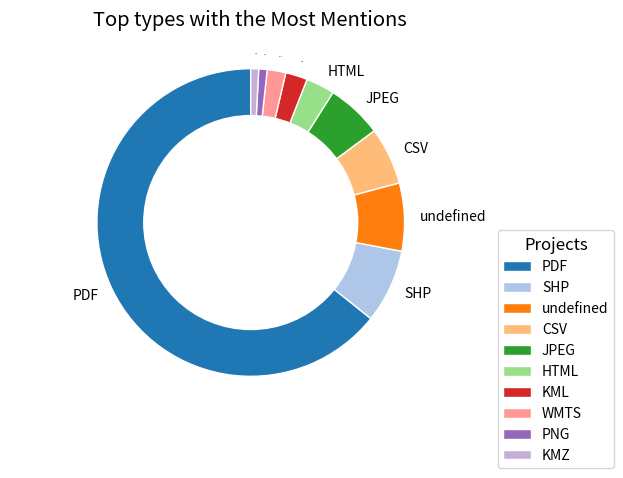

In [8]:
types = []

for j in o_dataset:
  if j['resources']:
      if j['resources'][0]['format']=='':  # undefined 
        types.append('undefined')
      elif j['resources'][0]['format']==".pdf": # combine pdf and PDF
        types.append('PDF')
      else:
        types.append(j['resources'][0]['format'])
  else:
      types.append('lost')

type_counts = Counter(types)
top_type = type_counts.most_common(10)


colors = plt.cm.tab20.colors
type_name = [i[0] for i in top_type]
type_mentions = [i[1] for i in top_type]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(type_mentions, labels=type_name, startangle=90,
                                   wedgeprops=dict(width=0.4, edgecolor='w'),
                                   autopct= '',  # Customize autopct
                                   pctdistance=0.85, colors=colors)  # Set pctdistance for percent labels

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add a circle in the center to create a doughnut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Adding annotation labels outside the pie chart, only preserve the majors
for index,text in enumerate(texts):
    text.set_fontsize(10) if index<6 else text.set_fontsize(0)
# only preserve the majors
for index,autotext in enumerate(autotexts):
    autotext.set_text('') if index>5 else None
    
plt.legend(
    loc='upper left',
    labels=type_name,
    bbox_to_anchor=(1, 0.5),
    prop={'size': 10},
    title="Projects"
)

plt.title('Top types with the Most Mentions',pad=20)
plt.tight_layout()
plt.show()